In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('globallandslides.csv')
df_copy = pd.read_csv('globallandslides.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,NaN,glc,684.0,China,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,956.0,United States,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,NaN,glc,973.0,Peru,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,1067.0,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,NaN,glc,2603.0,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [5]:
df = df[df.country_name=="India"]

In [6]:
df.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
32,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1055,07/22/2009 12:00:00 AM,NaN,"Kerseong, West Bengal",The disruption of popular toy train services i...,"Kerseong, West Bengal",10km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,1055.0,India,IN,Bengal,46427.0,Kārsiyāng,0.15035,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.278800,26.882600
34,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1054,07/22/2009 12:00:00 AM,NaN,"Gayabari, West Bengal",The disruption of popular toy train services i...,"Gayabari, West Bengal",10km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,1054.0,India,IN,Bengal,46427.0,Kārsiyāng,4.62496,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.314300,26.857200
45,Telegraph India,https://www.telegraphindia.com/1090707/jsp/sil...,1061,07/01/2009 05:40:00 AM,NaN,Bridge destroyed at 4th Mile,Landslides triggered by heavy rains hit an iro...,"4th Mile, Lower Mangshila in North Sikkim",1km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,"Original source is unknown, but it appears to ...",glc,1061.0,India,IN,NaN,1464.0,Mangan,3.54100,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.527000,27.478000
59,E-Pao,http://www.e-pao.net/GP.asp?src=28..210810.aug10,2164,07/29/2010 11:00:00 PM,NaN,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",Since the Chingai-Quingai road has been sunk d...,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",25km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,2164.0,India,IN,Manipur,15118.0,Phek,39.51186,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,94.482147,25.309863
62,ibnlive.in,http://ibnlive.in.com/generalnewsfeed/news/two...,3821,07/21/2011 12:00:00 AM,NaN,"Kumaon, Uttarakhand","Dehradun, July 21 (PTI) Two persons were kille...","Kumaon, Uttarakhand",25km,landslide,rain,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,3821.0,India,IN,Uttarakhand,32442.0,Almora,15.27100,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,79.636700,29.733400


In [7]:
df["Year"] = pd.to_datetime(df["event_date"]).dt.year

In [8]:
df = df[df.landslide_category=="landslide"]

## A map of only landslides that have happened within India

In [9]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

sns.set_style('whitegrid')

In [10]:
ls_df = df
ls_df = ls_df.dropna(axis=0, subset=['admin_division_name'])

In [11]:
ls_df["admin_division_name"].replace("Nāgāland", "Nagaland",inplace = True)
ls_df["admin_division_name"].replace("Meghālaya", "Meghalaya",inplace = True)
ls_df["admin_division_name"].replace("Tamil Nādu", "Tamil Nadu",inplace = True)
ls_df["admin_division_name"].replace("Karnātaka", "Karnataka",inplace = True)
ls_df["admin_division_name"].replace("Gujarāt", "Gujarat",inplace = True)
ls_df["admin_division_name"].replace("Arunāchal Pradesh", "Arunachal Pradesh",inplace = True)


C:\Users\USER\anaconda3\envs\landslide\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [12]:
state_df = ls_df["admin_division_name"].value_counts()
state_df = state_df.to_frame()
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State', 'Count']

In [13]:
state_df

,State,Count
0,Kashmir,189
1,Uttarakhand,167
2,Himachal Pradesh,137
3,Assam,74
4,Nagaland,65
5,Maharashtra,54
6,Manipur,47
7,Bengal,44
8,Kerala,43
9,Arunachal Pradesh,40


In [14]:
state_df.at[15,"Count"] = 69
state_df.drop(7)

,State,Count
0,Kashmir,189
1,Uttarakhand,167
2,Himachal Pradesh,137
3,Assam,74
4,Nagaland,65
5,Maharashtra,54
6,Manipur,47
8,Kerala,43
9,Arunachal Pradesh,40
10,Tamil Nadu,32


In [15]:
fp = r'Maps_with_python\india-polygon.shp'
map_df = gpd.read_file(fp)
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [16]:
state_df.at[0,"State"] = "Jammu and Kashmir"
state_df.at[20,"State"] = "Delhi"

In [17]:
#Merging the data
merged = map_df.set_index('st_nm').join(state_df.set_index('State'))
merged['Count'] = merged['Count'].replace(np.nan, 0)
merged.head()

,id,geometry,Count
st_nm,,,
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",0.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",40.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",74.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",1.0
Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",0.0


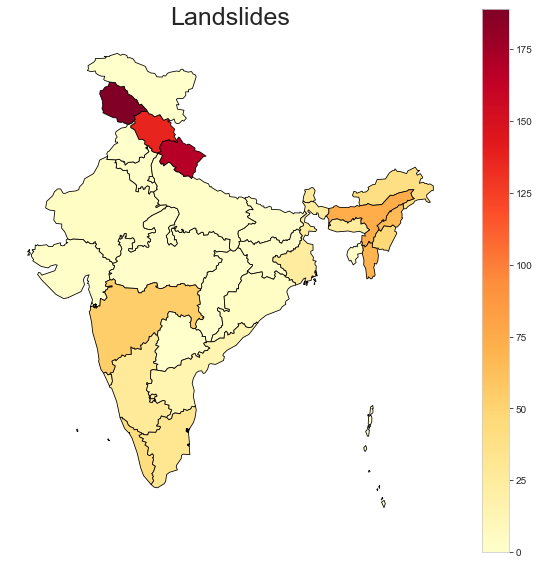

In [18]:
#create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Landslides', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='Count',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

In [19]:
assam_df = df[df['admin_division_name'] == "Assam"]
assam_df.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,Year
653,prokerala,http://www.prokerala.com/news/articles/a75292....,1109,08/20/2009 12:00:00 AM,NaN,Lumding-Badarpur section in North Cachar Hills...,The rail services between rest of India and so...,Lumding-Badarpur section in North Cachar Hills...,25km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,1109.0,India,IN,Assam,8364.0,Maibong,24.54328,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,93.1645,25.5215,2009
713,Hmar.net,http://hmar.net/?p=1870,322,10/21/2007 12:00:00 AM,NaN,National Highway 53 at Nungba in Tamenglong di...,blocked road,National Highway 53 at Nungba in Tamenglong di...,25km,landslide,rain,medium,unknown,NaN,NaN,NaN,NaN,NaN,glc,322.0,India,IN,Assam,12871.0,Lakhipur,43.16287,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,93.4333,24.7500,2007
898,www.nagalandpost.com,http://www.nagalandpost.com/ChannelNews/Region...,5343,08/17/2013 11:00:00 PM,NaN,The Imphal-Jiribam Section Of Nh-37 In Tamengl...,Over 700 Imphal-bound freight trucks were Sund...,The Imphal-Jiribam Section Of Nh-37 In Tamengl...,10km,landslide,continuous_rain,medium,unknown,NaN,NaN,NaN,NaN,NaN,glc,5343.0,India,IN,Assam,12871.0,Lakhipur,43.11128,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,93.4341,24.7625,2013
920,en.apa,http://en.apa.az/news.php?id=119178,1611,04/01/2010 12:00:00 AM,NaN,"Paglanala village, Dholai Block, near Dwarband...",The latest disaster has come from Assam where ...,"Paglanala village, Dholai Block, near Dwarband...",25km,landslide,downpour,medium,unknown,3.0,NaN,NaN,NaN,NaN,glc,1611.0,India,IN,Assam,39982.0,Hāflong,1.49521,09/12/2014 02:02:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,93.0280,25.1553,2010
993,articles.timesofindia,http://articles.timesofindia.indiatimes.com/20...,4382,06/03/2012 12:00:00 AM,NaN,"between Harangajao and Mailongdisa, Assa,",Torrential rain in the Barail Hill range for t...,"between Harangajao and Mailongdisa, Assa,",5km,landslide,downpour,medium,unknown,NaN,NaN,NaN,NaN,NaN,glc,4382.0,India,IN,Assam,39982.0,Hāflong,16.97606,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,92.8573,25.1175,2012


In [20]:
lat = assam_df['latitude'].tolist()
long = assam_df['longitude'].tolist()

In [21]:
map_df = map_df[map_df.st_nm == "Assam"]

                     geometry
0   POINT (93.16450 25.52150)
1   POINT (93.43330 24.75000)
2   POINT (93.43410 24.76250)
3   POINT (93.02800 25.15530)
4   POINT (92.85730 25.11750)
..                        ...
69  POINT (91.80200 26.19660)
70  POINT (93.14770 25.47490)
71  POINT (91.77470 26.10970)
72  POINT (91.68490 26.10010)
73  POINT (91.79860 26.16990)

[74 rows x 1 columns]


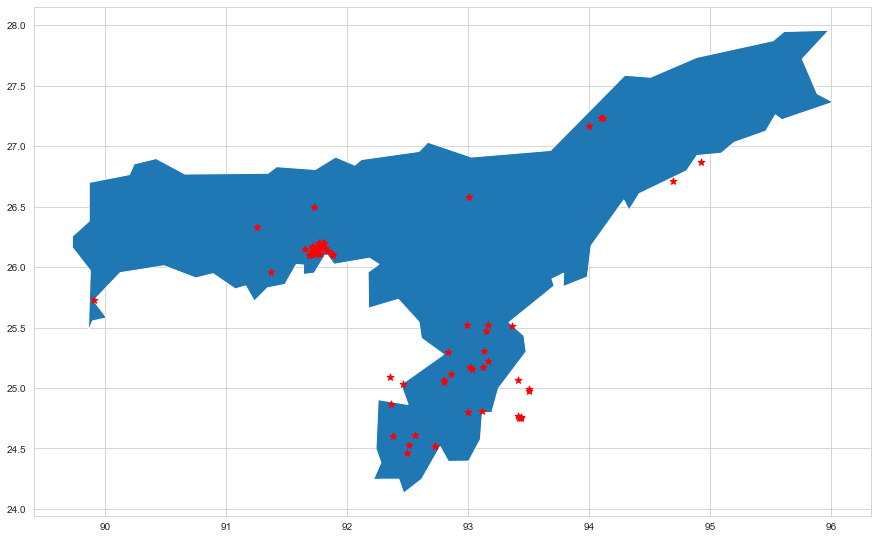

In [22]:
geometry = [Point(xy) for xy in zip(long,lat)]
fig,ax = plt.subplots(figsize = (15,15))
map_df.plot(ax = ax)
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 50, color = 'red',marker = '*',label = 'Assam')
plt.show()

In [23]:
fp = r'Assam_Map_Data\assam_administrative.shp'
xyz = gpd.read_file(fp)
xyz.head()

# fp = r'Assam_Map_Data\District\assam_location.dbf'
# dis_df = gpd.read_file(fp)
# dis_df.head()
# xyz_copy = gpd.read_file(fp)

,NAME,ADMIN_LEVE,geometry
0,None,2,"LINESTRING (89.59534 26.17677, 89.59553 26.176..."
1,None,2,"LINESTRING (89.59585 26.20165, 89.59674 26.201..."
2,Border India - Bangladesh,2,"LINESTRING (89.60897 26.15333, 89.60819 26.153..."
3,None,2,"LINESTRING (89.60540 26.18205, 89.60593 26.181..."
4,None,2,"LINESTRING (89.60571 26.15883, 89.60569 26.159..."


In [24]:
dis_df = pd.read_csv('District Points.csv')

In [25]:
dis_df = dis_df[dis_df.state_code == "ASSAM"]
dis_df

,parameter,district_code,state_code,Lat,Lon
285,7,Kokrajhar,ASSAM,26.402810,90.273819
286,10,Goalpara,ASSAM,26.176465,90.631164
290,65,Nalbari,ASSAM,26.444776,91.445234
291,96,Barpeta,ASSAM,26.318438,91.012313
292,85,Kamrup,ASSAM,26.181061,91.751916
307,32,Sonitpur,ASSAM,26.623221,92.791733
308,36,Marigaon,ASSAM,26.255106,92.337553
309,40,Bongaigaon,ASSAM,26.502443,90.564968
310,6,Darrang,ASSAM,26.441811,92.033565
311,12,Nagaon,ASSAM,26.355771,92.686525


In [26]:
merged_dis = xyz.set_index('NAME').join(dis_df.set_index('district_code'))
merged_dis.head()
merged_dis = merged_dis[merged_dis.Lat.notna()]
merged_dis.head()


,ADMIN_LEVE,geometry,parameter,state_code,Lat,Lon
Cachar,5,"LINESTRING (93.25298 24.97509, 93.26324 24.966...",30.0,ASSAM,24.820025,92.795038
Dhemaji,5,"LINESTRING (95.27734 27.68539, 95.26752 27.667...",45.0,ASSAM,27.484400,94.594933
Dibrugarh,5,"LINESTRING (95.20330 27.66398, 95.22604 27.655...",81.0,ASSAM,27.480193,94.912419
Goalpara,5,"LINESTRING (90.80349 26.12357, 90.82177 26.117...",10.0,ASSAM,26.176465,90.631164
Golaghat,5,"LINESTRING (94.16775 26.35327, 94.17979 26.354...",9.0,ASSAM,26.509522,93.974001


In [27]:
merged_dis.reset_index(level=0, inplace=True)


In [28]:
merged_dis.head()

,index,ADMIN_LEVE,geometry,parameter,state_code,Lat,Lon
0,Cachar,5,"LINESTRING (93.25298 24.97509, 93.26324 24.966...",30.0,ASSAM,24.820025,92.795038
1,Dhemaji,5,"LINESTRING (95.27734 27.68539, 95.26752 27.667...",45.0,ASSAM,27.484400,94.594933
2,Dibrugarh,5,"LINESTRING (95.20330 27.66398, 95.22604 27.655...",81.0,ASSAM,27.480193,94.912419
3,Goalpara,5,"LINESTRING (90.80349 26.12357, 90.82177 26.117...",10.0,ASSAM,26.176465,90.631164
4,Golaghat,5,"LINESTRING (94.16775 26.35327, 94.17979 26.354...",9.0,ASSAM,26.509522,93.974001


In [29]:
merged_dis.columns = ['District', 'ADMIN_LEVE','geometry','parameter', 'state_code', 'Lat', 'Lon']
merged_dis.head()

,District,ADMIN_LEVE,geometry,parameter,state_code,Lat,Lon
0,Cachar,5,"LINESTRING (93.25298 24.97509, 93.26324 24.966...",30.0,ASSAM,24.820025,92.795038
1,Dhemaji,5,"LINESTRING (95.27734 27.68539, 95.26752 27.667...",45.0,ASSAM,27.484400,94.594933
2,Dibrugarh,5,"LINESTRING (95.20330 27.66398, 95.22604 27.655...",81.0,ASSAM,27.480193,94.912419
3,Goalpara,5,"LINESTRING (90.80349 26.12357, 90.82177 26.117...",10.0,ASSAM,26.176465,90.631164
4,Golaghat,5,"LINESTRING (94.16775 26.35327, 94.17979 26.354...",9.0,ASSAM,26.509522,93.974001


In [30]:
merged_dis.District[0]

'Cachar'

                     geometry
0   POINT (93.16450 25.52150)
1   POINT (93.43330 24.75000)
2   POINT (93.43410 24.76250)
3   POINT (93.02800 25.15530)
4   POINT (92.85730 25.11750)
..                        ...
69  POINT (91.80200 26.19660)
70  POINT (93.14770 25.47490)
71  POINT (91.77470 26.10970)
72  POINT (91.68490 26.10010)
73  POINT (91.79860 26.16990)

[74 rows x 1 columns]


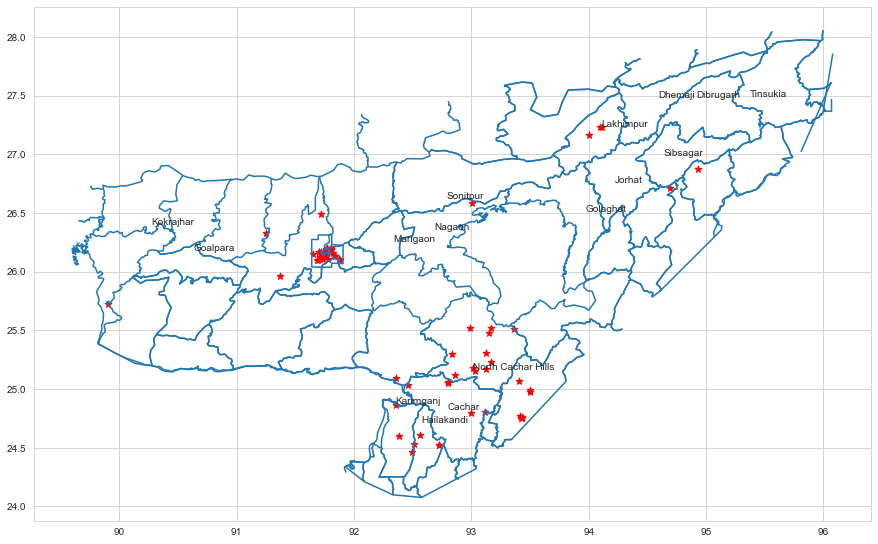

In [31]:
geometry = [Point(xy) for xy in zip(long,lat)]
fig,ax = plt.subplots(figsize = (15,15))
xyz.plot(ax = ax)
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 50, color = 'red',marker = '*',label = 'Assam')

for i in range(len(merged_dis)):
    plt.text(merged_dis.Lon[i],merged_dis.Lat[i],"{}".format(merged_dis.District[i]),size=10)
    
plt.show()

In [42]:
fp = r'Districts\Census_2011\2011_Dist.shp'
dis = gpd.read_file(fp)
dis.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [43]:
dis = dis[dis.ST_NM == "Assam"]

In [37]:
xyz = pd.read_csv('district wise population and centroids.csv')

In [38]:
xyz = xyz[xyz.State == "Assam"]

In [39]:
xyz.drop(['Population in 2001', 'Population in 2011'], axis='columns', inplace=True)

In [40]:
xyz.head()

,State,District,Latitude,Longitude
24,Assam,Barpeta,26.427872,90.979120
25,Assam,Bongaigaon,26.450125,90.673430
26,Assam,Cachar,24.815571,92.868497
27,Assam,Darrang,26.584632,92.041413
28,Assam,Dhemaji,27.586533,94.713369


In [44]:
merged_dis = dis.set_index('DISTRICT').join(xyz.set_index('District'))
merged_dis.head()
merged_dis = merged_dis[merged_dis.Latitude.notna()]
merged_dis.head()

,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,State,Latitude,Longitude
DISTRICT,,,,,,,,
Barpeta,Assam,18,4,303,"POLYGON ((91.16927 26.65240, 91.16787 26.64642...",Assam,26.427872,90.979120
Bongaigaon,Assam,18,20,319,"POLYGON ((90.85418 26.52336, 90.85336 26.52153...",Assam,26.450125,90.673430
Cachar,Assam,18,17,316,"POLYGON ((93.25235 24.97158, 93.25237 24.96905...",Assam,24.815571,92.868497
Darrang,Assam,18,26,325,"POLYGON ((92.32865 26.67036, 92.33490 26.66867...",Assam,26.584632,92.041413
Dhemaji,Assam,18,9,308,"POLYGON ((94.58063 27.21371, 94.57922 27.21355...",Assam,27.586533,94.713369


In [45]:
merged_dis.reset_index(level=0, inplace=True)
merged_dis.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,State,Latitude,Longitude
0,Barpeta,Assam,18,4,303,"POLYGON ((91.16927 26.65240, 91.16787 26.64642...",Assam,26.427872,90.979120
1,Bongaigaon,Assam,18,20,319,"POLYGON ((90.85418 26.52336, 90.85336 26.52153...",Assam,26.450125,90.673430
2,Cachar,Assam,18,17,316,"POLYGON ((93.25235 24.97158, 93.25237 24.96905...",Assam,24.815571,92.868497
3,Darrang,Assam,18,26,325,"POLYGON ((92.32865 26.67036, 92.33490 26.66867...",Assam,26.584632,92.041413
4,Dhemaji,Assam,18,9,308,"POLYGON ((94.58063 27.21371, 94.57922 27.21355...",Assam,27.586533,94.713369


                     geometry
0   POINT (93.16450 25.52150)
1   POINT (93.43330 24.75000)
2   POINT (93.43410 24.76250)
3   POINT (93.02800 25.15530)
4   POINT (92.85730 25.11750)
..                        ...
69  POINT (91.80200 26.19660)
70  POINT (93.14770 25.47490)
71  POINT (91.77470 26.10970)
72  POINT (91.68490 26.10010)
73  POINT (91.79860 26.16990)

[74 rows x 1 columns]


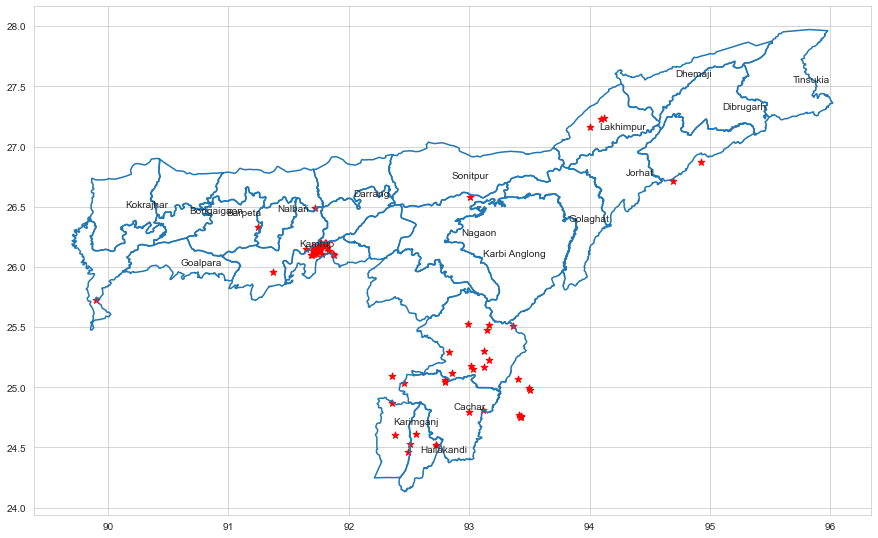

In [47]:
geometry = [Point(xy) for xy in zip(long,lat)]
fig,ax = plt.subplots(figsize = (15,15))
dis.boundary.plot(ax = ax)
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 50, color = 'red',marker = '*',label = 'Assam')

for i in range(len(xyz)):
    plt.text(merged_dis.Longitude[i],merged_dis.Latitude[i],"{}".format(merged_dis.DISTRICT[i]),size=10)
    
plt.show()


# fig,ax = plt.subplots(figsize = (15,15))
# dis.boundary.plot(ax = ax)
# for i in range(len(xyz)):
#     plt.text(merged_dis.Longitude[i],merged_dis.Latitude[i],"{}".format(merged_dis.DISTRICT[i]),size=10)

## A plot showing the total number of landslides that have happened in India every year

In [32]:
y_values = df.groupby(['Year']).country_name.count().values

In [33]:
y_values.tolist()

[66, 46, 48, 226, 151, 75, 170, 68, 184, 68]

In [34]:
x_values = df.groupby(['Year']).country_name.count().index.values

In [35]:
x_values.tolist()

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

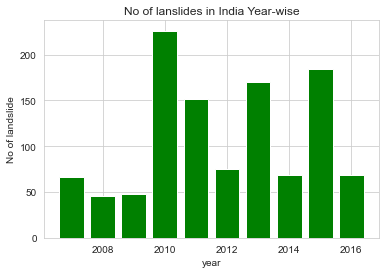

In [36]:
plt.bar(x_values,y_values, color = "green")
plt.xlabel("year")
plt.ylabel("No of landslide")
plt.title("No of lanslides in India Year-wise")
plt.show()